In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

da = pd.read_csv('data.csv')
nba= "data.csv"
raw = pd.read_csv(nba)

da.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [3]:

da.shape

(30697, 25)

In [4]:
random_sample = da.take(np.random.permutation(len(da))[:4])
random_sample.T

,14270,23058,1864,30023
action_type,Alley Oop Dunk Shot,Slam Dunk Shot,Jump Shot,Jump Shot
combined_shot_type,Dunk,Dunk,Jump Shot,Jump Shot
game_event_id,112,357,362,452
game_id,20800807,29600559,20100301,41100235
lat,34.0373,34.0443,34.0373,33.8573
loc_x,9,0,138,151
loc_y,7,0,7,187
lon,-118.261,-118.27,-118.132,-118.119
minutes_remaining,1,1,0,7
period,1,3,3,4


In [5]:
not_needed = []

In [6]:
print(da['action_type'].unique())
print(da['combined_shot_type'].unique())

['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Driving Layup Shot' 'Reverse Layup Shot' 'Reverse Dunk Shot'
 'Slam Dunk Shot' 'Turnaround Jump Shot' 'Tip Shot' 'Running Hook Shot'
 'Alley Oop Dunk Shot' 'Dunk Shot' 'Alley Oop Layup shot'
 'Running Dunk Shot' 'Driving Finger Roll Shot' 'Running Layup Shot'
 'Finger Roll Shot' 'Fadeaway Jump Shot' 'Follow Up Dunk Shot' 'Hook Shot'
 'Turnaround Hook Shot' 'Running Tip Shot' 'Jump Hook Shot'
 'Running Finger Roll Shot' 'Jump Bank Shot' 'Turnaround Finger Roll Shot'
 'Hook Bank Shot' 'Driving Hook Shot' 'Running Reverse Layup Shot'
 'Driving Finger Roll Layup Shot' 'Fadeaway Bank shot' 'Pullup Jump shot'
 'Finger Roll Layup Shot' 'Turnaround Fadeaway shot'
 'Driving Reverse Layup Shot' 'Driving Slam Dunk Shot'
 'Step Back Jump shot' 'Reverse Slam Dunk Shot' 'Turnaround Bank shot'
 'Running Finger Roll Layup Shot' 'Floating Jump shot'
 'Putback Slam Dunk Shot' 'Running Bank shot' 'Driving Bank shot'
 'Putback Layup Shot'

In [7]:
not_needed.extend(['game_event_id', 'game_id'])

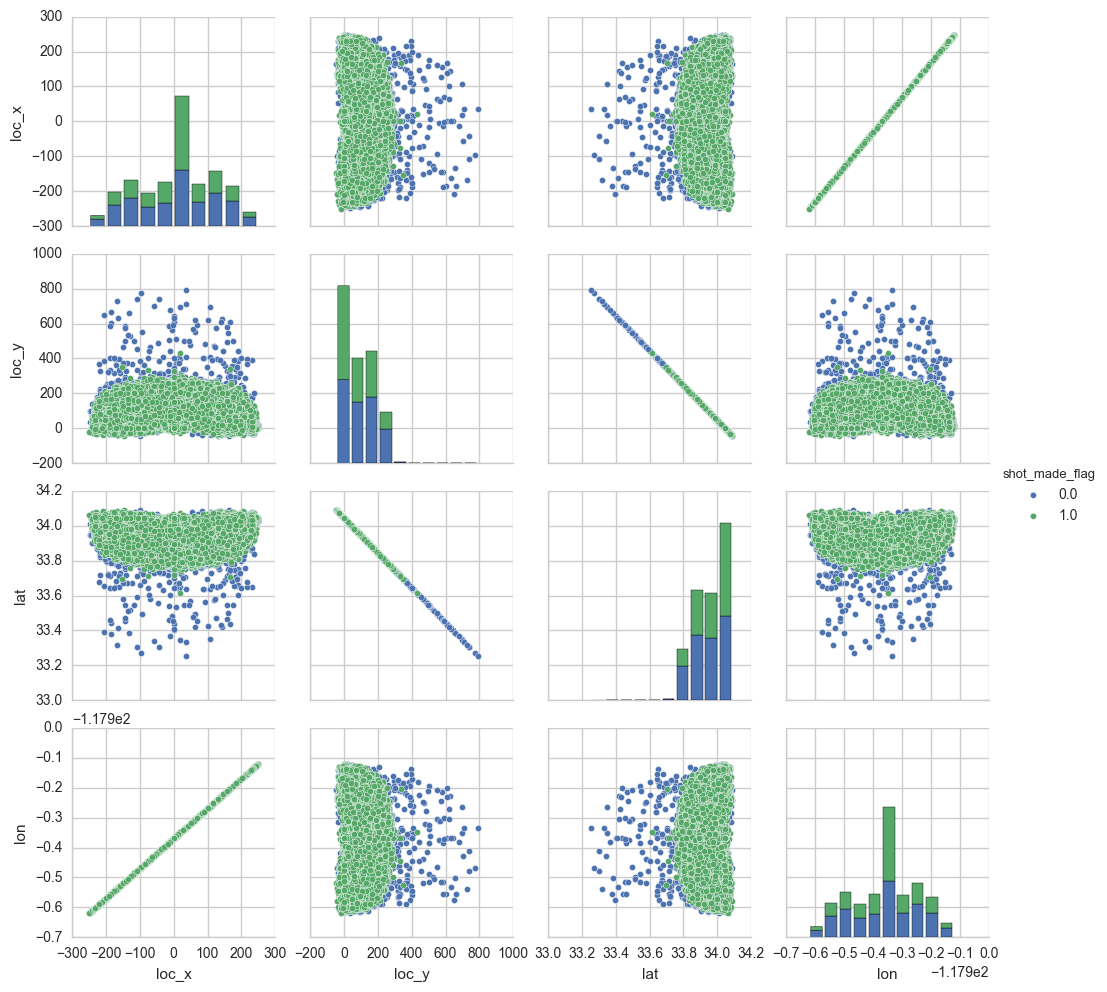

In [8]:
sns.set_style('whitegrid')
sns.pairplot(da, vars=['loc_x', 'loc_y', 'lat', 'lon'], hue='shot_made_flag')

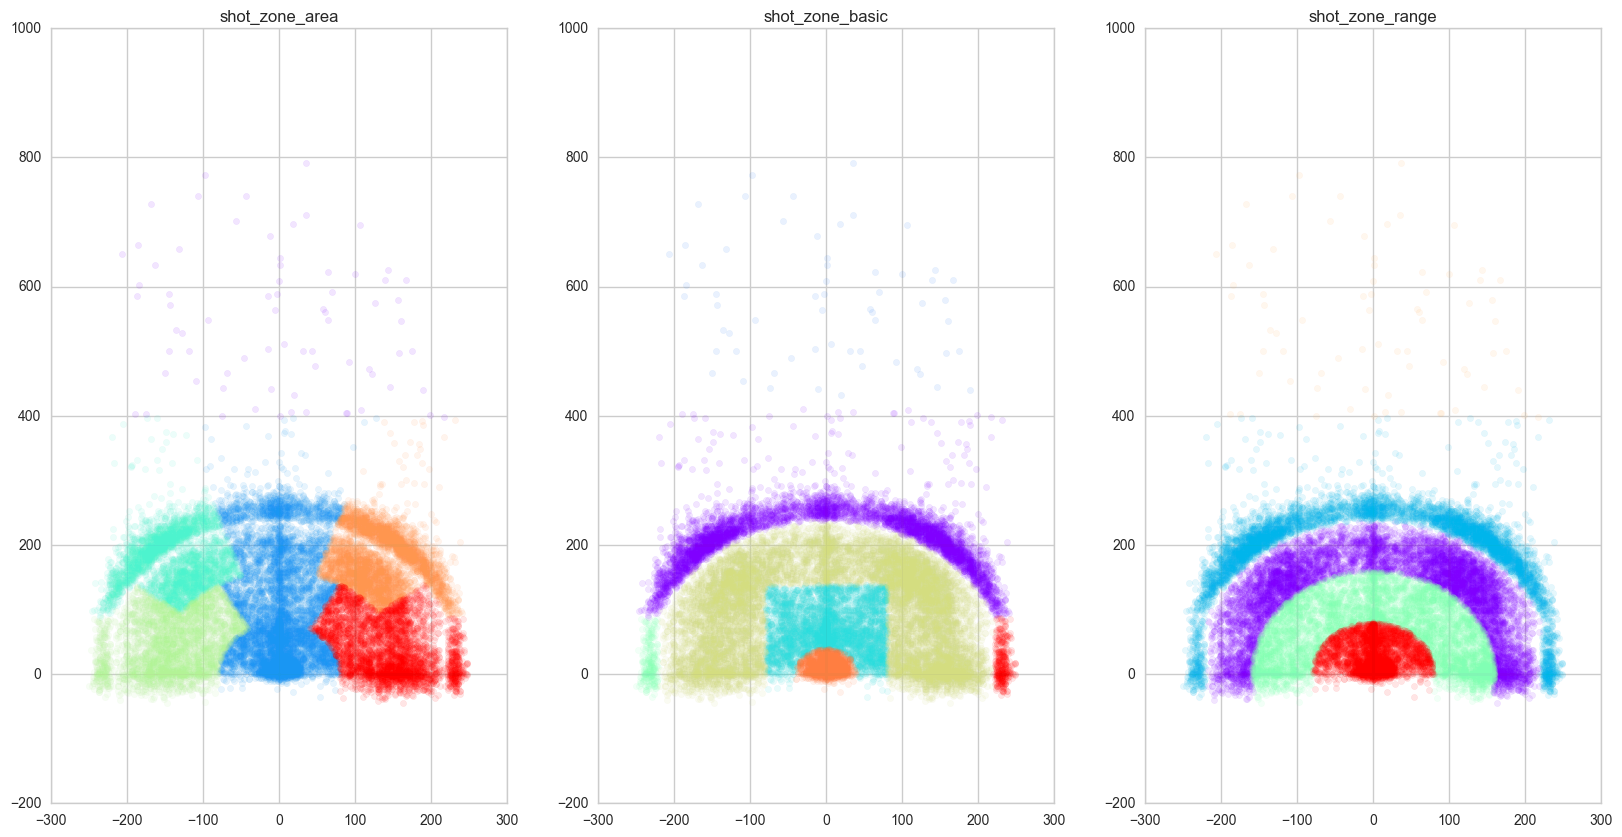

In [9]:
import matplotlib.cm as cm
nona =  raw[pd.notnull(raw['shot_made_flag'])]
nba= "data.csv"
raw = pd.read_csv(nba)
plt.figure(figsize=(20,10))

def scatter_plot_by_category(feat):
    alpha = 0.1
    gs = nona.groupby(feat)
    cs = cm.rainbow(np.linspace(0, 1, len(gs)))
    for g, c in zip(gs, cs):
        plt.scatter(g[1].loc_x, g[1].loc_y, color=c, alpha=alpha)

# shot_zone_area
plt.subplot(131)
scatter_plot_by_category('shot_zone_area')
plt.title('shot_zone_area')

# shot_zone_basic
plt.subplot(132)
scatter_plot_by_category('shot_zone_basic')
plt.title('shot_zone_basic')

# shot_zone_range
plt.subplot(133)
scatter_plot_by_category('shot_zone_range')
plt.title('shot_zone_range')
plt.figure(figsize=(20,10))



In [10]:
da_main = da[da['shot_made_flag']>=0]
da_main.head(3)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4


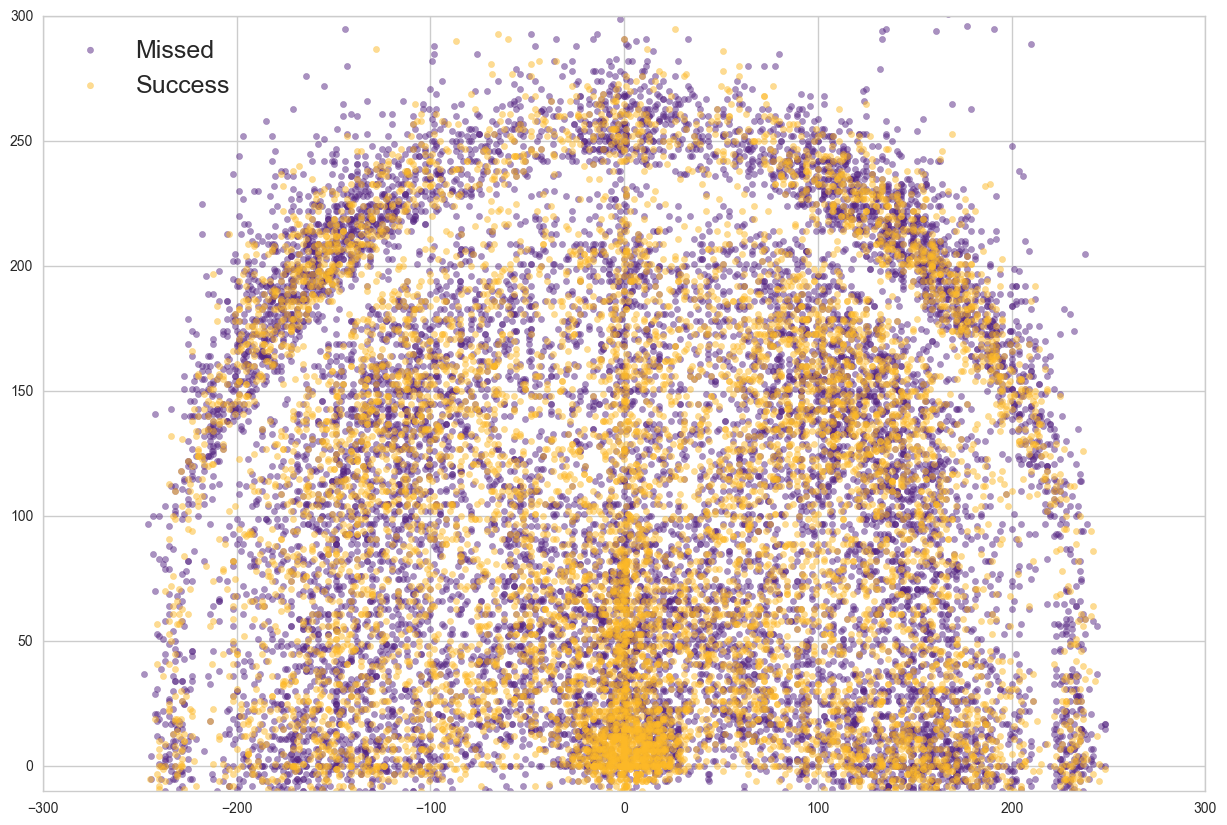

In [11]:
plt.figure(figsize=(15,10))
plt.scatter(da_main[da_main.shot_made_flag==0].loc_x,da_main[da_main.shot_made_flag==0].loc_y,color='#552582',label='Missed',alpha=0.5)
plt.scatter(da_main[da_main.shot_made_flag==1].loc_x,da_main[da_main.shot_made_flag==1].loc_y,color='#FDB927',label='Success',alpha=0.5)

plt.ylim(-10,300)
plt.legend(fontsize=18,loc='upper left')

In [12]:
loc_x_range = np.arange(-300,300,10)
binned = pd.cut(da_main.loc_x,loc_x_range)
binned_da = pd.DataFrame(binned)
binned_da.columns = ['loc_x_bin']
da_main = pd.concat([da_main,binned_da],axis=1)

In [13]:
loc_y_range = np.arange(-50,300,50)
binned_y = pd.cut(da_main.loc_y,loc_y_range)
binned_y_da = pd.DataFrame(binned_y)
binned_y_da.columns = ['loc_y_bin']
da_main = pd.concat([da_main,binned_y_da],axis=1)

In [14]:
loc_da =da_main.groupby(["loc_x_bin", "loc_y_bin"]).aggregate({'loc_x':np.mean,
                                                      'loc_y':np.mean,
                                                      'shot_made_flag':['count',np.sum]}).reset_index()
loc_da.columns = [' '.join(col).strip() for col in loc_da.columns.values]
loc_da.rename(columns={'shot_made_flag count':'total_shot','shot_made_flag sum':'Success','loc_x mean':'avg_x_loc',
                       'loc_y mean':'avg_y_loc'},inplace=True)
#loc_da.columns=["loc_x_bin", "loc_y_bin",'total_shot','Success','avg_x_loc','avg_y_loc']
loc_da['Success_Rate']= loc_da.Success / loc_da.total_shot
loc_da = loc_da[(loc_da.Success>50) &(loc_da.Success_Rate>0.4)]
loc_da.sort_values('Success_Rate',ascending=False).head(10)

,loc_x_bin,loc_y_bin,avg_y_loc,total_shot,Success,avg_x_loc,Success_Rate
146,"(0, 10]","(-50, 0]",-2.985714,70,56.0,5.385714,0.800000
147,"(0, 10]","(0, 50]",20.227964,329,210.0,5.218845,0.638298
141,"(-10, 0]","(0, 50]",19.317416,356,226.0,-3.303371,0.634831
140,"(-10, 0]","(-50, 0]",-0.046782,4382,2746.0,-0.048608,0.626654
153,"(10, 20]","(0, 50]",17.644599,287,160.0,15.703833,0.557491
186,"(60, 70]","(150, 200]",172.727273,99,55.0,65.606061,0.555556
143,"(-10, 0]","(100, 150]",125.808511,94,51.0,-3.702128,0.542553
135,"(-20, -10]","(0, 50]",18.818966,232,120.0,-14.116379,0.517241
149,"(0, 10]","(100, 150]",124.186275,102,52.0,4.715686,0.509804
142,"(-10, 0]","(50, 100]",71.512077,207,105.0,-3.304348,0.507246


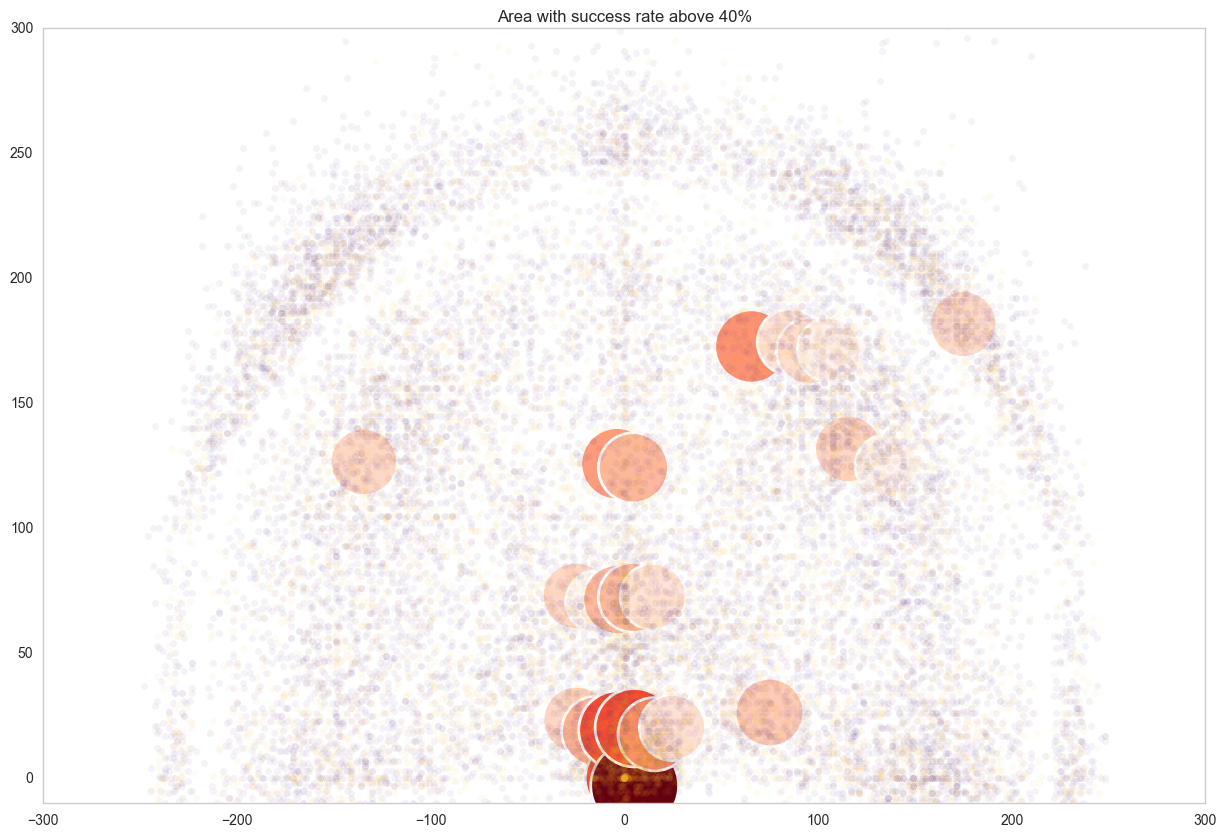

In [16]:
cm = plt.cm.get_cmap('Reds') 
fig, ax = plt.subplots(figsize=(15,10))
bubble_size = (loc_da.Success_Rate)*5000

sc = ax.scatter(loc_da.avg_x_loc,loc_da.avg_y_loc,s=bubble_size,linewidths=2, edgecolor='w',c=bubble_size,cmap=cm)
sc = ax.scatter(da_main[da_main.shot_made_flag==0].loc_x,da_main[da_main.shot_made_flag==0].loc_y,color='#552582',
                label='Missed',alpha=0.05)
sc = ax.scatter(da_main[da_main.shot_made_flag==1].loc_x,da_main[da_main.shot_made_flag==1].loc_y,color='#FDB927',
                label='Success',alpha=0.05)
ax.grid()

# ax.xaxis.set_major_formatter(plt.NullFormatter())
# ax.yaxis.set_major_formatter(plt.NullFormatter())
plt.ylim(-10,300)
plt.xlim(-300,300)
plt.title('Area with success rate above 40%')